In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model

## Loading and Preprocessing MNIST Dataset for Classification

In [2]:
"""
This code loads the MNIST dataset, converts it into a format suitable for machine learning,
and prepares the labels for a 10-class classification task.
"""

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


## Creating a Neural Network Model for MNIST Digit Classification

In [3]:
"""
This code defines a function to create a neural network model with one hidden layers for classifying MNIST images.
It then creates an instance of this model for 28x28 images with 10 classes.
"""

def model_factory(input_shape, num_classes):
  input_layer = layers.Input(shape=input_shape)
  flatten_layer = layers.Flatten()(input_layer)

  hidden_layer1 = layers.Dense(128, activation='relu')(flatten_layer)

  output_layer = layers.Dense(num_classes, activation='softmax')(hidden_layer1)

  return Model(inputs=input_layer, outputs=output_layer)

model_mnist = model_factory(input_shape=(28, 28), num_classes=10)

## Configuring the MNIST Model for Training with Adam Optimizer

In [4]:
"""
This code sets up the MNIST model for training. It uses the Adam optimizer with a learning rate of 0.001,
and it will train the model to minimize the categorical cross-entropy loss and measure performance using accuracy.
"""

sgd_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_mnist.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Training the MNIST Model with Training Data

In [5]:
MLP_model = model_mnist.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 3.7516 - accuracy: 0.8571 - val_loss: 0.7996 - val_accuracy: 0.8787
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5124 - accuracy: 0.8985 - val_loss: 0.4874 - val_accuracy: 0.9064
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3193 - accuracy: 0.9255 - val_loss: 0.3964 - val_accuracy: 0.9241
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2523 - accuracy: 0.9375 - val_loss: 0.3698 - val_accuracy: 0.9212
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2280 - accuracy: 0.9422 - val_loss: 0.3233 - val_accuracy: 0.9306
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2074 - accuracy: 0.9460 - val_loss: 0.3268 - val_accuracy: 0.9338
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1940 - accuracy: 0.9505 - val_loss: 0.3602 - val_accuracy: 0.9337
Epoch 

## Plot Loss

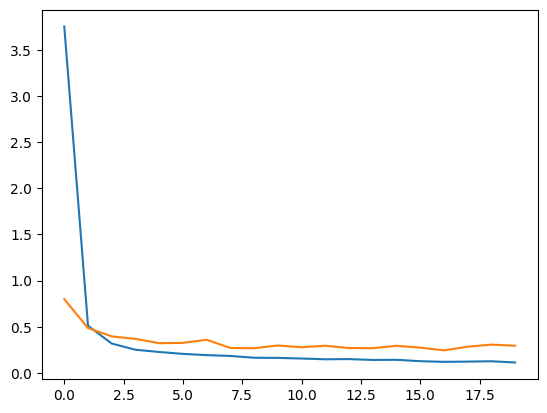

In [6]:
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

## Plot Accuracy

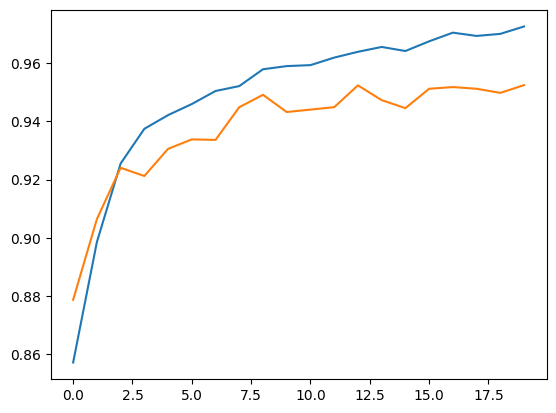

In [7]:
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])